# Deep dive

By Ishan Sharma

### Executive summary

In this project, I seek to analyze cancer data across the United States and compare them against various indices that could plausibly be causing higher rates. Through, this, I wish to be able to construct a model which can predict cancer based on such indices.

The impact of such a solution would be a list of potential causes of cancer which could be further analyzed, and if indeed proven they could be dealt with. This would improve the health of the United States.

My data consists of a very granular analysis of cancer data by county, over several years. Being too dense to attach to a github repo, I shall instead link to the dataset [here](https://1drv.ms/f/s!AneQxAmQInlBks8f2UygKzbvNH3F6w?e=Leb351), downloaded [here](https://ghdx.healthdata.org/record/ihme-data/united-states-cancer-mortality-rates-county-1980-2014). 

The first, and perhaps simplest, part of the dataset, is under "Annual". This is data of cases the US and various states by year. It is raw data, where there are columns for location, cause, sex, and bounds, and this data is collated under several states. 

The second part of the dataset is under "linking_ids". This is less data and more of an index to keep all of the IDs straight. 

The third part of this dataset is under "national". This consists of multiple sheets, all of differing rates of cancer by county over the years from 1980 to 2014. 

The fourth part of this dataset, "percent_difference", consists of an index of IDs, as well as a list of percent changes in cases over time, in common with "Annual". 

The fifth part of this dataset, "state_by_state" consists of excel spreadsheets, each of showing several states broken down by county. In separate sheets are data for various types of cancer by time interval, and together all these spreadsheets contain data for cancer broken down in each county of the United States by time interval. 

The sixth part of this dataset, "top_and_bottom", contains cancers and their mortality rates by US county, with top and bottom 10 ranked causes. This is data that may be unnecessary, as I can process this (and more than just top and bottom) myself. This contains columns for processing standard, county, ranking of cause, the cause itself, and mortality rates.

In this notebook, I have deep-dived into my dataset. I have constructed clusters of my dataset, and in particular there is a distinct division between east and west, with the east having higher cancer mortality than the rest. 

### Introduction

##### My goal

In this project, I seek to analyze cancer data across the United States and compare them against various indices that could plausibly be causing higher rates. Through, this, I wish to be able to construct a model which can predict cancer based on such indices.

The impact of such a solution would be a list of potential causes of cancer which could be further analyzed, and if indeed proven they could be dealt with. This would improve the health of the United States

##### My data

My data consists of a very granular analysis of cancer data by county, over several years. Being too dense to attach to a github repo, I shall instead link to the dataset [here](https://1drv.ms/f/s!AneQxAmQInlBks8f2UygKzbvNH3F6w?e=Leb351), downloaded [here](https://ghdx.healthdata.org/record/ihme-data/united-states-cancer-mortality-rates-county-1980-2014). 

The first, and perhaps simplest, part of the dataset, is under "Annual". This is data of cases the US and various states by year. It is raw data, where there are columns for location, cause, sex, and bounds, and this data is collated under several states. 

The second part of the dataset is under "linking_ids". This is less data and more of an index to keep all of the IDs straight. 

The third part of this dataset is under "national". This consists of multiple sheets, all of differing rates of cancer by county over the years from 1980 to 2014. 

The fourth part of this dataset, "percent_difference", consists of an index of IDs, as well as a list of percent changes in cases over time, in common with "Annual". 

The fifth part of this dataset, "state_by_state" consists of excel spreadsheets, each of showing several states broken down by county. In separate sheets are data for various types of cancer by time interval, and together all these spreadsheets contain data for cancer broken down in each county of the United States by time interval. 

The sixth part of this dataset, "top_and_bottom", contains cancers and their mortality rates by US county, with top and bottom 10 ranked causes. This is data that may be unnecessary, as I can process this (and more than just top and bottom) myself. This contains columns for processing standard, county, ranking of cause, the cause itself, and mortality rates.

##### Project Organization

In my first notebook, `notebooks\first_pass.ipynb`, I have sifted through my data in an effort to clean it for the first time. 

In my second notebook, `notebooks\eda_and_basic_modelling.ipynb`, I have engaged in what the title states, EDA and basic modelling. The bulk of my EDA is focused on `data\national`, which contains the most comprehensive amount of data, cancer mortality rates divided by county and divided by 37 different types of cancer. To prevent myself from being overloaded, I have decided to investigate general US mortality rates, and mortality rates in the minimum and maximum counties and states. Some notable findings I have uncovered includes that:
* Summit County, Colorado consistently appears as a county with the lowest mortality rate
* Oglala Lakota County, South Dakota consistently appears as a county with the highest mortality rate
* Utah consistently appears as a state with the lowest mortality rate
* The District of Columbia consistently appears as a state with the highest mortality rate, some improvement in more recent years notwithstanding

Additionally, I have engaged in very basic modelling, linear regression on all 37 of the data sheets in `data\national` to predict former dates with latter dates. Through this, I have been able to make 37 models varying from 87% to 98% in terms of accuracy - which is quite excellent - and I could theoretically stitch together these models to create one big one with identical accuracy levels, by turning sheet names into indicator variables. This provides a good jumping off point for investigating further patterns with the data and building models taking them into account. 

In my third notebook `notebooks\deep_dive.ipynb`, I have engaged in more comprehensive modelling. After a great deal of wrangling, I have used a map of US counties from [here](https://github.com/holtzy/The-Python-Graph-Gallery) to engage in geographic clustering of my data. Through my clustering, I successfully found a division of the United States into two - the east and west, with the northeast being more similar to the west - with lower cancer mortality rates in the west than the east. The reason for this is out of bounds for my project. 

In [1]:
import pandas as pd

### Data processing

This process may be seen in ```eda_and_basic_modelling.ipynb```. 

##### Annual

In [2]:
annual_df = {}
annual_df['united_states'] = pd.read_csv('../data/capstone_project/Annual/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_UNITED STATES_Y2017M01D24.CSV')
annual_df['united_states'].drop(['upper', 'lower', 'FIPS'], axis=1)

,location_id,location_name,cause_id,cause_name,sex_id,sex,year_id,mx
0,102,United States,410,Neoplasms,1,Male,1980,318.333996
1,102,United States,410,Neoplasms,1,Male,1981,314.284167
2,102,United States,410,Neoplasms,1,Male,1982,309.425610
3,102,United States,410,Neoplasms,1,Male,1983,309.215150
4,102,United States,410,Neoplasms,1,Male,1984,309.424437
...,...,...,...,...,...,...,...,...
3390,102,United States,488,Other neoplasms,3,Both,2010,5.788080
3391,102,United States,488,Other neoplasms,3,Both,2011,5.820354
3392,102,United States,488,Other neoplasms,3,Both,2012,5.846857
3393,102,United States,488,Other neoplasms,3,Both,2013,5.808207


In [3]:
annual_df['tennessee'] = pd.read_csv('../data/capstone_project/Annual/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_TENNESSEE_Y2017M01D24.CSV')
annual_df['texas'] = pd.read_csv('../data/capstone_project/Annual/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_TEXAS_Y2017M01D24.CSV')
annual_df['utah'] = pd.read_csv('../data/capstone_project/Annual/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_UTAH_Y2017M01D24.CSV')
annual_df['vermont'] = pd.read_csv('../data/capstone_project/Annual/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_VERMONT_Y2017M01D24.CSV')
annual_df['virginia'] = pd.read_csv('../data/capstone_project/Annual/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_VIRGINIA_Y2017M01D24.CSV')
annual_df['washington'] = pd.read_csv('../data/capstone_project/Annual/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_WASHINGTON_Y2017M01D24.CSV')
annual_df['west_virginia'] = pd.read_csv('../data/capstone_project/Annual/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_WEST VIRGINIA_Y2017M01D24.CSV')
annual_df['wyoming'] = pd.read_csv('../data/capstone_project/Annual/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_WYOMING_Y2017M01D24.CSV')


##### Linking ids

In [4]:
linking_df = pd.read_csv('../data/capstone_project/linking_ids/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_CODEBOOK_Y2017M01D24.CSV').iloc[1:, 1:]

##### National

In [5]:
national_dfs = pd.read_excel('../data/capstone_project/national/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_NATIONAL_Y2017M01D24.XLSX', skiprows=1, sheet_name=None)

In [6]:
for sheet in national_dfs.keys():
    national_dfs[sheet].drop(national_dfs[sheet].tail(2).index,inplace=True)
    national_dfs[sheet]['is_state'] = national_dfs[sheet]['FIPS'] < 100
    national_dfs[sheet]['is_us'] = national_dfs[sheet]['FIPS'].isna()
    national_dfs[sheet]['is_county'] = national_dfs[sheet]['FIPS'] > 100

    national_dfs[sheet][['1980_exact', '1980_min', '1980_max']] = national_dfs[sheet]['Mortality Rate, 1980*'].str.split(' ', expand=True)
    national_dfs[sheet]['1980_exact'] = national_dfs[sheet]['1980_exact'].astype(float)
    national_dfs[sheet]['1980_min'] = national_dfs[sheet]['1980_min'].str[1:-1].astype(float)
    national_dfs[sheet]['1980_max'] = national_dfs[sheet]['1980_max'].str[:-1].astype(float)

    national_dfs[sheet][['1985_exact', '1985_min', '1985_max']] = national_dfs[sheet]['Mortality Rate, 1985*'].str.split(' ', expand=True)
    national_dfs[sheet]['1985_exact'] = national_dfs[sheet]['1985_exact'].astype(float)
    national_dfs[sheet]['1985_min'] = national_dfs[sheet]['1985_min'].str[1:-1].astype(float)
    national_dfs[sheet]['1985_max'] = national_dfs[sheet]['1985_max'].str[:-1].astype(float)

    national_dfs[sheet][['1990_exact', '1990_min', '1990_max']] = national_dfs[sheet]['Mortality Rate, 1990*'].str.split(' ', expand=True)
    national_dfs[sheet]['1990_exact'] = national_dfs[sheet]['1990_exact'].astype(float)
    national_dfs[sheet]['1990_min'] = national_dfs[sheet]['1990_min'].str[1:-1].astype(float)
    national_dfs[sheet]['1990_max'] = national_dfs[sheet]['1990_max'].str[:-1].astype(float)

    national_dfs[sheet][['1995_exact', '1995_min', '1995_max']] = national_dfs[sheet]['Mortality Rate, 1995*'].str.split(' ', expand=True)
    national_dfs[sheet]['1995_exact'] = national_dfs[sheet]['1995_exact'].astype(float)
    national_dfs[sheet]['1995_min'] = national_dfs[sheet]['1995_min'].str[1:-1].astype(float)
    national_dfs[sheet]['1995_max'] = national_dfs[sheet]['1995_max'].str[:-1].astype(float)

    national_dfs[sheet][['2000_exact', '2000_min', '2000_max']] = national_dfs[sheet]['Mortality Rate, 2000*'].str.split(' ', expand=True)
    national_dfs[sheet]['2000_exact'] = national_dfs[sheet]['2000_exact'].astype(float)
    national_dfs[sheet]['2000_min'] = national_dfs[sheet]['2000_min'].str[1:-1].astype(float)
    national_dfs[sheet]['2000_max'] = national_dfs[sheet]['2000_max'].str[:-1].astype(float)

    national_dfs[sheet][['2005_exact', '2005_min', '2005_max']] = national_dfs[sheet]['Mortality Rate, 2005*'].str.split(' ', expand=True)
    national_dfs[sheet]['2005_exact'] = national_dfs[sheet]['2005_exact'].astype(float)
    national_dfs[sheet]['2005_min'] = national_dfs[sheet]['2005_min'].str[1:-1].astype(float)
    national_dfs[sheet]['2005_max'] = national_dfs[sheet]['2005_max'].str[:-1].astype(float)

    national_dfs[sheet][['2010_exact', '2010_min', '2010_max']] = national_dfs[sheet]['Mortality Rate, 2010*'].str.split(' ', expand=True)
    national_dfs[sheet]['2010_exact'] = national_dfs[sheet]['2010_exact'].astype(float)
    national_dfs[sheet]['2010_min'] = national_dfs[sheet]['2010_min'].str[1:-1].astype(float)
    national_dfs[sheet]['2010_max'] = national_dfs[sheet]['2010_max'].str[:-1].astype(float)

    national_dfs[sheet][['2014_exact', '2014_min', '2014_max']] = national_dfs[sheet]['Mortality Rate, 2014*'].str.split(' ', expand=True)
    national_dfs[sheet]['2014_exact'] = national_dfs[sheet]['2014_exact'].astype(float)
    national_dfs[sheet]['2014_min'] = national_dfs[sheet]['2014_min'].str[1:-1].astype(float)
    national_dfs[sheet]['2014_max'] = national_dfs[sheet]['2014_max'].str[:-1].astype(float)

##### Percent difference

In [7]:
percent_difference_linking_df = pd.read_csv('../data/capstone_project/percent_difference/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_CODEBOOK_PCT_DIFF_Y2017M01D24.CSV', skiprows=1).iloc[1:, 1:]

In [8]:
percent_difference_df = pd.read_csv('../data/capstone_project/percent_difference/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_PCT_DIFF_Y2017M01D24.CSV')
percent_difference_df.drop('FIPS', axis=1)

,location_id,location_name,cause_id,cause_name,sex_id,sex,pc_change_val,upper,lower
0,102,United States,410,Neoplasms,1,Male,-27.413802,-25.187488,-29.220296
1,102,United States,410,Neoplasms,2,Female,-13.630408,-11.505307,-15.299046
2,102,United States,410,Neoplasms,3,Both,-20.063635,-18.217181,-21.421733
3,523,Alabama,410,Neoplasms,1,Male,-18.368852,-15.299238,-20.807560
4,523,Alabama,410,Neoplasms,2,Female,1.358138,4.729149,-1.454474
...,...,...,...,...,...,...,...,...,...
309813,3700,Washakie County,488,Other neoplasms,2,Female,10.676856,44.333683,-15.029088
309814,3700,Washakie County,488,Other neoplasms,3,Both,0.242977,21.315584,-17.897009
309815,3699,Weston County,488,Other neoplasms,1,Male,-10.884845,13.943731,-30.073494
309816,3699,Weston County,488,Other neoplasms,2,Female,-2.420175,22.417314,-24.445990


##### State by state

In [9]:
import os 
import glob 

states_files = glob.glob(os.path.join('../data/capstone_project/state_by_state', "*")) 
states_data = {}

for state_file in states_files:
    states_data[state_file] = pd.read_excel(state_file, skiprows=1, sheet_name=None)

In [10]:
for state_data_key in states_data.keys():
    state_data_df = states_data[state_data_key]
    for sheet_key in state_data_df.keys():
        sheet = state_data_df[sheet_key]        
        states_data[state_data_key][sheet_key] = sheet.drop(sheet[sheet.isna()['Mortality Rate, 2014*']].index)

##### Top and bottom

In [11]:
top_ten_dfs = pd.read_excel('../data/capstone_project/top_and_bottom/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_TOP_10_CAUSES_BY_COUNTY_Y2017M01D24.XLSX', skiprows=1, sheet_name=None)

In [12]:
bottom_ten_df = pd.read_excel('../data/capstone_project/top_and_bottom/IHME_USA_COUNTY_CANCER_MORTALITY_RATES_1980_2014_TOP_BOTTOM_10_COUNTIES_BY_CAUSE_Y2017M01D24.XLSX', skiprows=2, sheet_name='Top and Bottom 10')
bottom_ten_df = bottom_ten_df.drop(['Unnamed: 3', 'Unnamed: 7', 'Unnamed: 11'], axis=1)
bottom_sheets_list = bottom_ten_df.keys()
bottom_sheet_dict = {}
for index, elem in enumerate(bottom_sheets_list):
    bottom_sheet_dict[elem] = index

In [13]:
def get_bottom_ten(ky):
    iter_level = 15 * bottom_sheet_dict[ky]
    return bottom_ten_df[iter_level:iter_level+11]

### Geographic clustering model

In [14]:
import geopandas as gpd
import geoplot.crs as gcrs
import geoplot as gplt

Here I am using a file of US counties from [here](https://github.com/holtzy/The-Python-Graph-Gallery) to map it.

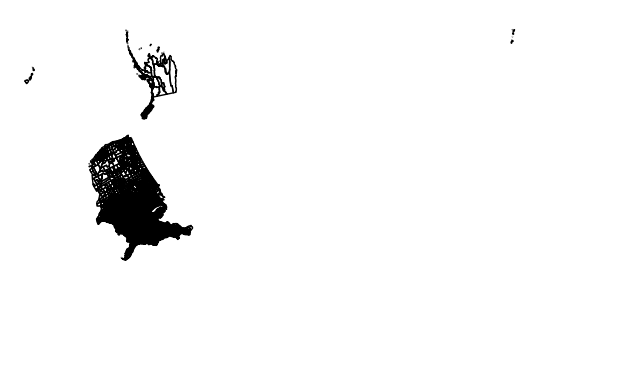

In [15]:
import matplotlib.pyplot as plt

us_map = gpd.read_file(
    'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson'
)

us_map.id = us_map['id'].astype(int)

us_map = us_map[~us_map.STATE.isin(['72'])]

gplt.polyplot(
    us_map,
    projection=gcrs.AlbersEqualArea()
)
plt.show()

I have successfully loaded in this dataset of US counties. 

Now I can merge it in with my national data to run data analysis.

To get a full list of existing columns:

In [16]:
national_dfs['Neoplasms'].columns

Index(['Location', 'FIPS', 'Mortality Rate, 1980*', 'Mortality Rate, 1985*',
       'Mortality Rate, 1990*', 'Mortality Rate, 1995*',
       'Mortality Rate, 2000*', 'Mortality Rate, 2005*',
       'Mortality Rate, 2010*', 'Mortality Rate, 2014*',
       '% Change in Mortality Rate, 1980-2014', 'is_state', 'is_us',
       'is_county', '1980_exact', '1980_min', '1980_max', '1985_exact',
       '1985_min', '1985_max', '1990_exact', '1990_min', '1990_max',
       '1995_exact', '1995_min', '1995_max', '2000_exact', '2000_min',
       '2000_max', '2005_exact', '2005_min', '2005_max', '2010_exact',
       '2010_min', '2010_max', '2014_exact', '2014_min', '2014_max'],
      dtype='object')

For this, it might make sense to do some clustering on the relevant columns: ```['is_state', 'is_us',
       'is_county', '1980_exact', '1980_min', '1980_max', '1985_exact',
       '1985_min', '1985_max', '1990_exact', '1990_min', '1990_max',
       '1995_exact', '1995_min', '1995_max', '2000_exact', '2000_min',
       '2000_max', '2005_exact', '2005_min', '2005_max', '2010_exact',
       '2010_min', '2010_max', '2014_exact', '2014_min', '2014_max']```

Additionally, I should add a column representing the centroid of the county.

In [17]:
states = ["Alabama", "Alaska", "", "Arizona", "Arkansas", "California", "", "Colorado", "Connecticut", "Delaware", "District of Columbia", 
          "Florida", "Georgia","", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
            "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
            "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", #39
            "Oklahoma", "Oregon", "Pennsylvania","" , "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", #48
            "Utah", "Vermont", "Virginia", "", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

In [18]:
from sklearn.cluster import DBSCAN

In [19]:
for sheet in national_dfs.keys():
    loc_split = national_dfs[sheet]['Location'].str.split(" County, | Borough, | Parish, ", expand=True)
    national_dfs[sheet]["County"] = loc_split[0]
    national_dfs[sheet]["State"] = loc_split[1]

In [20]:
us_map['Centroid'] = us_map['geometry'].centroid
us_map['Centroid_x'] = us_map['Centroid'].x
us_map['Centroid_y'] = us_map['Centroid'].y

C:\Users\sharm\AppData\Local\Temp\ipykernel_3376\1840714510.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  us_map['Centroid'] = us_map['geometry'].centroid


In [21]:
us_map.head()

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,Centroid,Centroid_x,Centroid_y
0,1001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402...",POINT (-86.64120 32.53615),-86.641196,32.536153
1,1009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840...",POINT (-86.56976 33.98525),-86.569756,33.985248
2,1017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772...",POINT (-85.38992 32.91159),-85.389924,32.911594
3,1021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929...",POINT (-86.71979 32.85025),-86.719793,32.850253
4,1033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587...",POINT (-87.80589 34.70164),-87.805890,34.701644


In [22]:
us_map['STATE'] = us_map['STATE'].astype(int)

In [23]:
us_map_fulldef = []
for st_index in us_map['STATE']:
    if(st_index <= 56):
        st_st_index = states[st_index-1]
    else:
        st_st_index = ""
    us_map_fulldef.append(st_st_index)
us_map['state_fulldef'] = us_map_fulldef

In [24]:
for sheet in national_dfs.keys():
    national_dfs[sheet] = national_dfs[sheet].merge(us_map, left_on=['State', 'County'], right_on=['state_fulldef', 'NAME'])

Now I have combined national_dfs with the rest. 

In [ ]:
cluster_cols = ['is_state', 'is_us',
       'is_county', '1980_exact', '1980_min', '1980_max', '1985_exact',
       '1985_min', '1985_max', '1990_exact', '1990_min', '1990_max',
       '1995_exact', '1995_min', '1995_max', '2000_exact', '2000_min',
       '2000_max', '2005_exact', '2005_min', '2005_max', '2010_exact',
       '2010_min', '2010_max', '2014_exact', '2014_min', '2014_max', 'Centroid_x', 'Centroid_y']

In [58]:
import numpy as np

In [70]:
X = {}
cluster_labels = {}
for sheet in national_dfs.keys():
    X[sheet] = national_dfs[sheet][cluster_cols]
    dbscan_model = DBSCAN(eps=0.25, min_samples=8)
    cluster_labels[sheet] = dbscan_model.fit_predict(X[sheet])
    national_dfs[sheet]['cluster'] = cluster_labels[sheet]

In [73]:
keys_with_values = []
for sheet in national_dfs.keys():
    _, counts = np.unique(cluster_labels[sheet], return_counts=True)
    if counts.__len__() > 1:
        keys_with_values.append(sheet)

keys_with_values

['Nasopharynx cancer',
 'Other pharynx cancer',
 'Gallbladder & biliary tract ',
 'Non-melanoma skin cancer',
 'Testicular cancer',
 'Thyroid cancer',
 'Mesothelioma',
 'Hodgkin lymphoma',
 'Acute lymphoid leukemia',
 'Chronic myeloid leukemia']

I failed to find clusters in several of them. I did find clusters in ```[Nasopharynx cancer, Other pharynx cancer, Gallbladder and biliary tract, Non-melanoma skin cancer, Testicular cancer, Thyroid cancer, Mesothelioma, Hodgkin lymphoma, Acute lymphoid leukemia, Chronic myeloid leukemia]```, however.

Next, I shall map these various clusterings. 

c:\Users\sharm\.conda\envs\geoEnv\lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 4.
  warnings.warn(


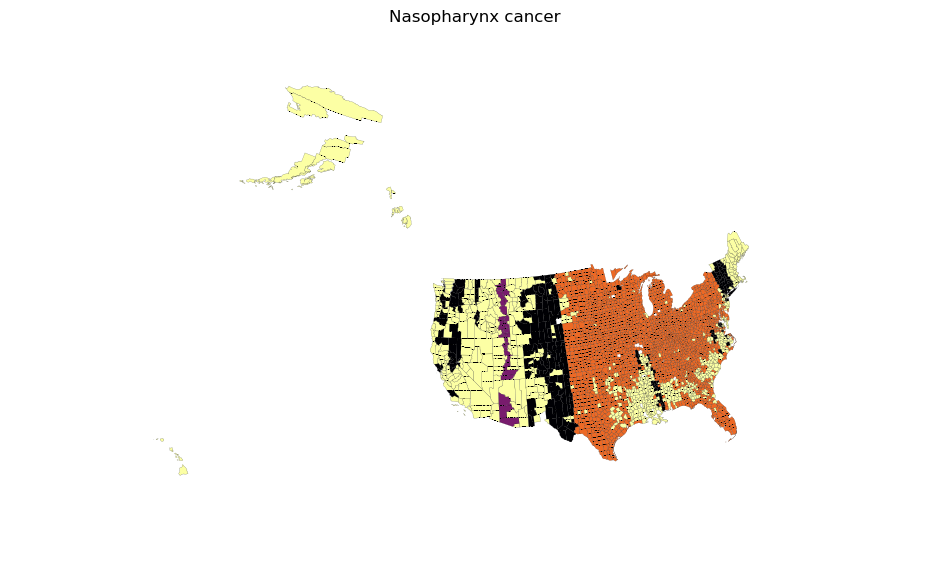

c:\Users\sharm\.conda\envs\geoEnv\lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 4.
  warnings.warn(


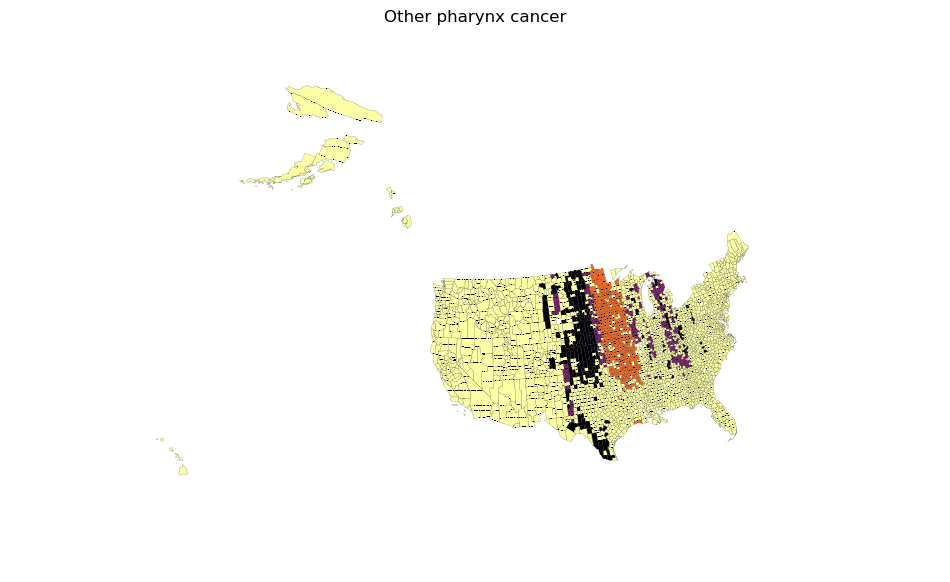

c:\Users\sharm\.conda\envs\geoEnv\lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 2.
  warnings.warn(


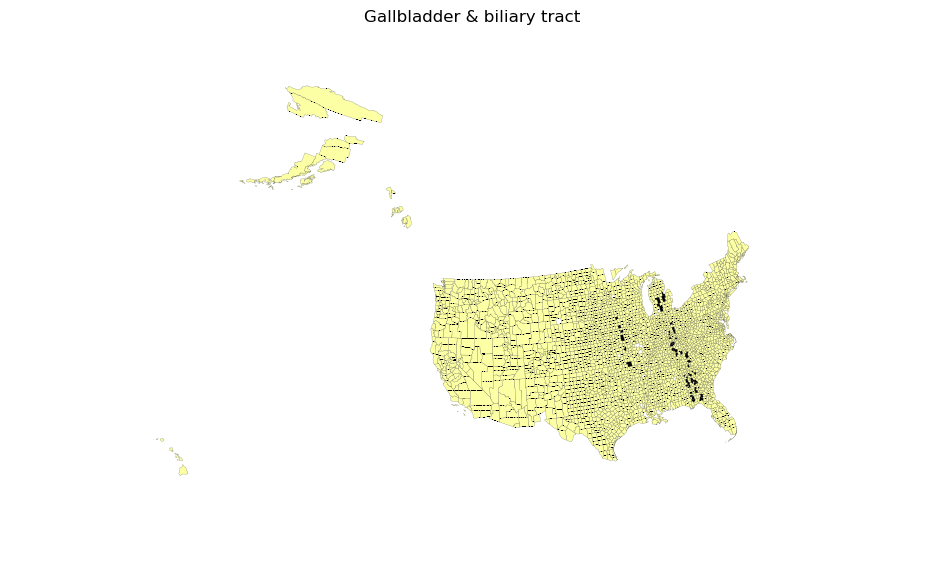

c:\Users\sharm\.conda\envs\geoEnv\lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 2.
  warnings.warn(


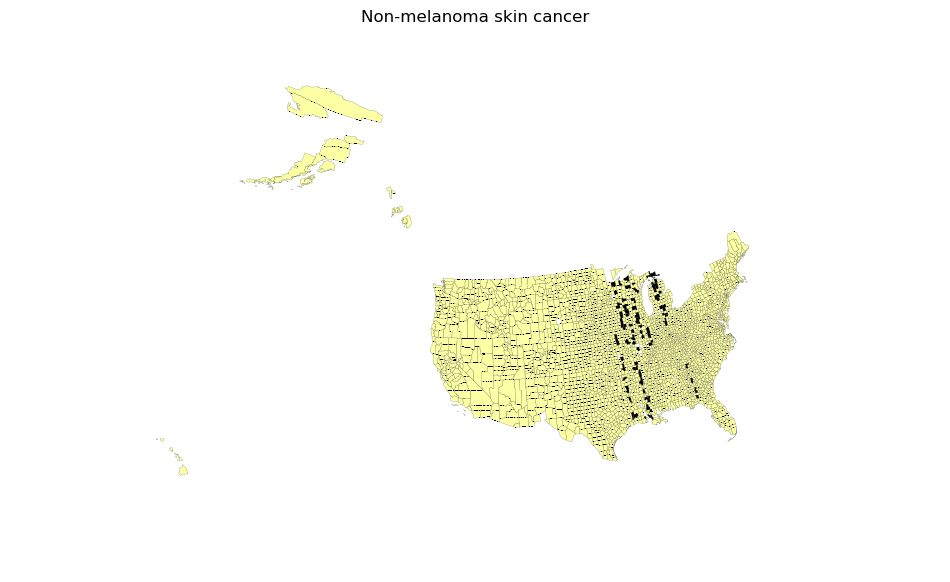

c:\Users\sharm\.conda\envs\geoEnv\lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 3.
  warnings.warn(


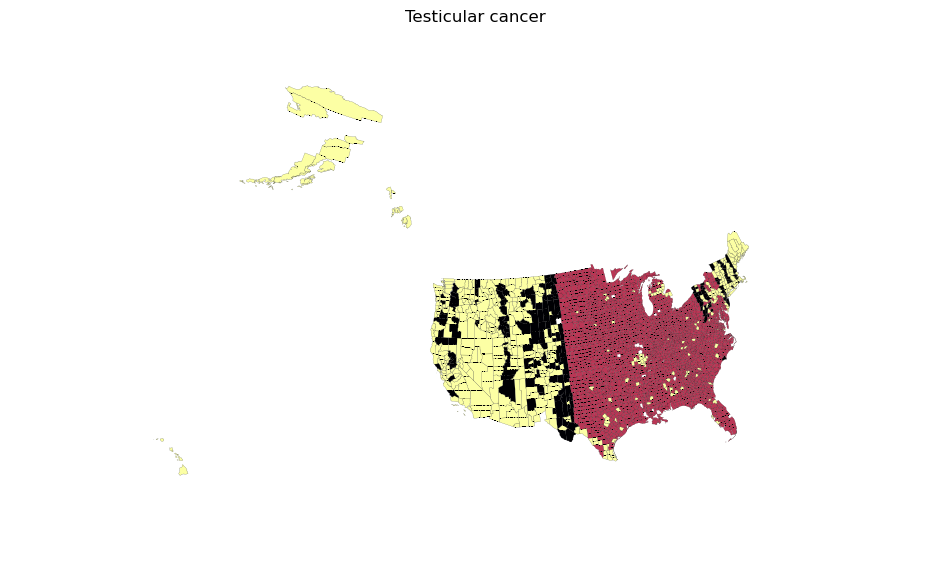

c:\Users\sharm\.conda\envs\geoEnv\lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 3.
  warnings.warn(


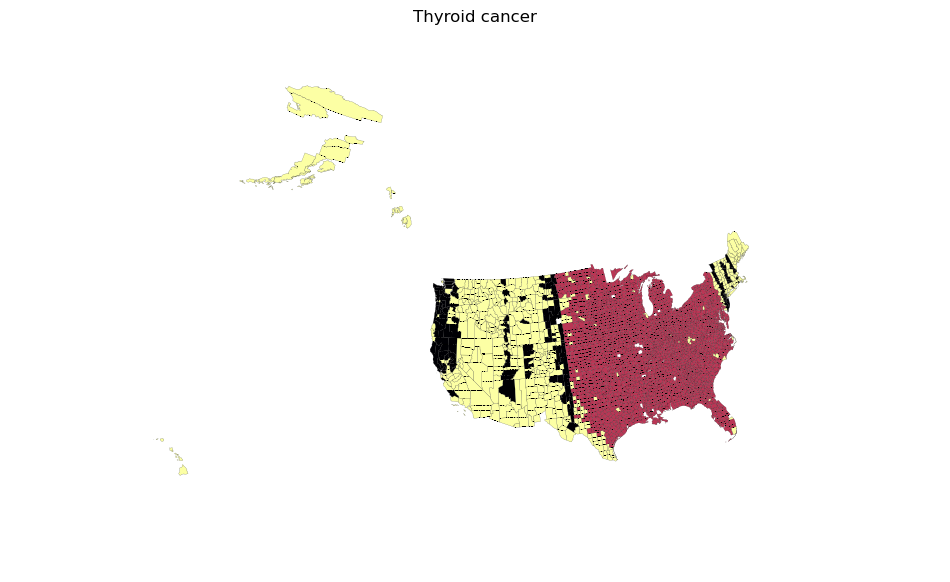

c:\Users\sharm\.conda\envs\geoEnv\lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 4.
  warnings.warn(


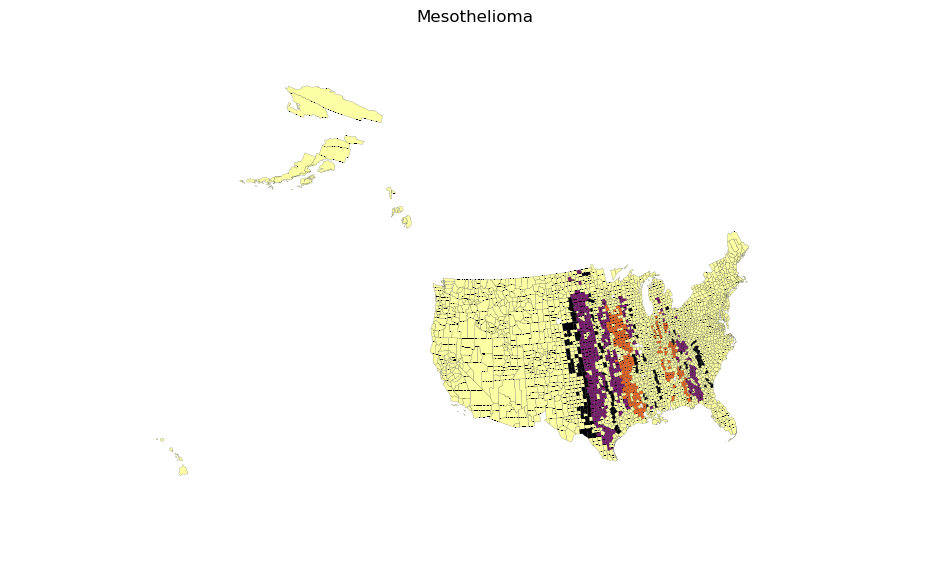

c:\Users\sharm\.conda\envs\geoEnv\lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 4.
  warnings.warn(


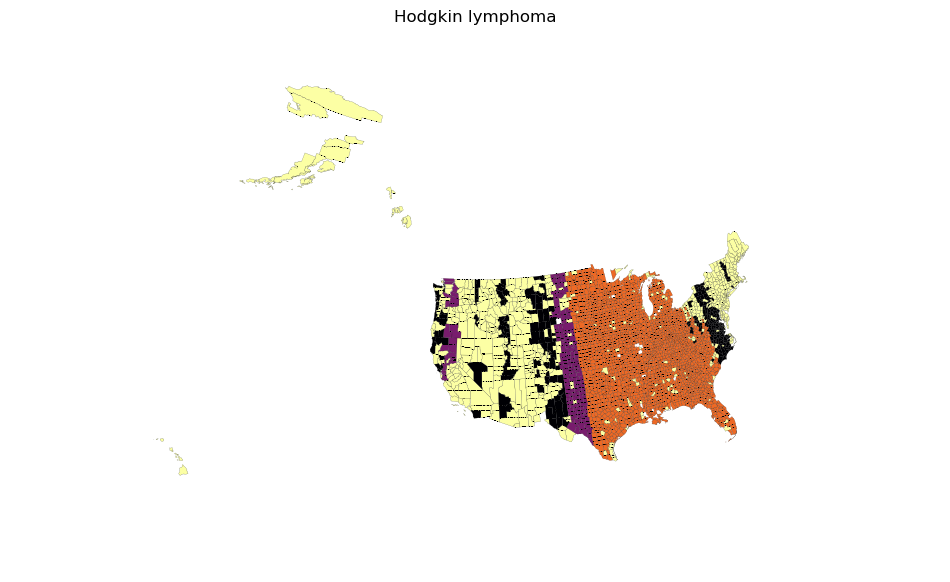

c:\Users\sharm\.conda\envs\geoEnv\lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 6.
  warnings.warn(


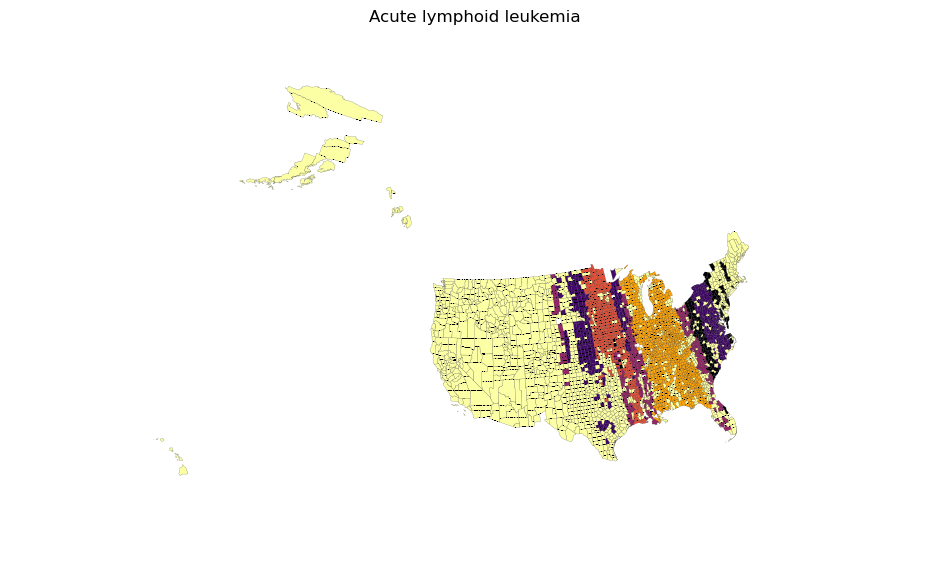

c:\Users\sharm\.conda\envs\geoEnv\lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 5.
  warnings.warn(


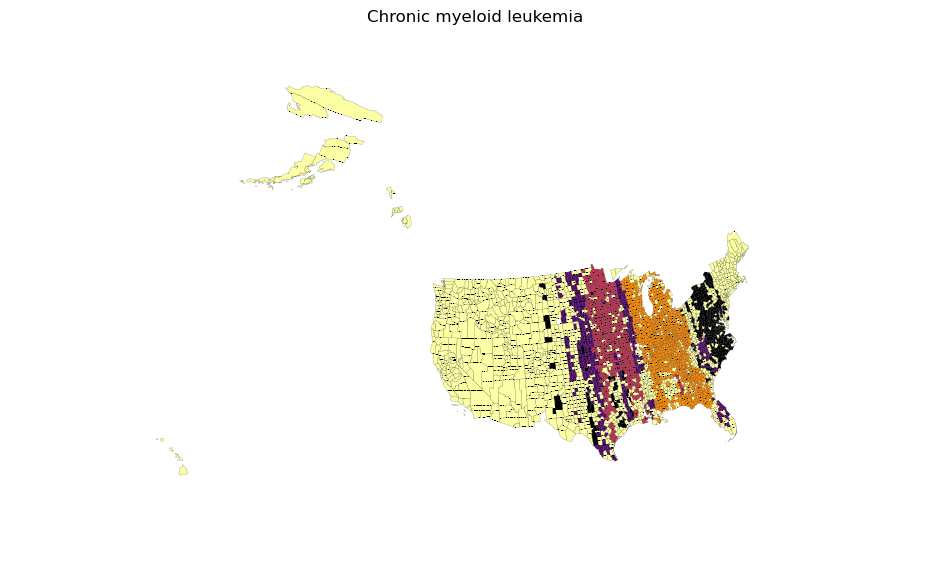

In [74]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import mapclassify as mc

for sheet in keys_with_values:
    scheme = mc.Quantiles(cluster_labels[sheet], k=10)

    gplt.choropleth(
        gpd.GeoDataFrame(national_dfs[sheet][['cluster', 'geometry']]),
        projection=gcrs.AlbersEqualArea(),
        hue="cluster",
        scheme=scheme, cmap='inferno_r',
        linewidth=.1,
        edgecolor='black',
        figsize=(12, 8)
    )

    plt.title(sheet)

    plt.show()

For several of these sheets, there are similar clusters. ```Gallbladder & biliary tract``` and ```Non-melanoma skin cancer``` are both similar, in that they have exactly one cluster from Michigan southwards. ```Acute lymphoid leukemia``` and ```Chronic myeloid leukemia``` have pretty similar clusters, in that they have several clusters in the eastern half of the US with a large one from the Midwest to southwards, and there is a second one in the eastern Plains. Additionally, ```Nasopharynx cancer```, ```Testicular cancer```, ```Thyroid cancer```, and ```Hodgkin lymphoma``` have pretty similar clusters, one large cluster from the halfway mark of the US, eastwards to (and not including) the Northeast. 

To further examine the clusters, I shall look at ```Testicular cancer```:

In [84]:
nat_df_tst = national_dfs['Testicular cancer']
nat_df_tst[['cluster']].value_counts()

cluster
 0         2306
-1          529
 3           38
 1           26
 10          21
 9           17
 2           16
 8           15
 6           11
 16          11
 7           10
 4           10
 12          10
 15           9
 5            8
 11           8
 13           8
 14           8
Name: count, dtype: int64

In [ ]:
nat_df_tst_graph_data = nat_df_tst[['cluster', '1980_exact', '1980_min', '1980_max', '1985_exact',
                                    '1985_min', '1985_max', '1990_exact', '1990_min', '1990_max',
                                    '1995_exact', '1995_min', '1995_max', '2000_exact', '2000_min',
                                    '2000_max', '2005_exact', '2005_min', '2005_max', '2010_exact',
                                    '2010_min', '2010_max', '2014_exact', '2014_min', '2014_max']]

In [88]:
cluster_dfs = pd.get_dummies(nat_df_tst_graph_data['cluster'])
nat_df_tst_graph_data = cluster_dfs.merge(nat_df_tst_graph_data, left_index=True, right_index=True)

In [89]:
cluster_dfs.head()

,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


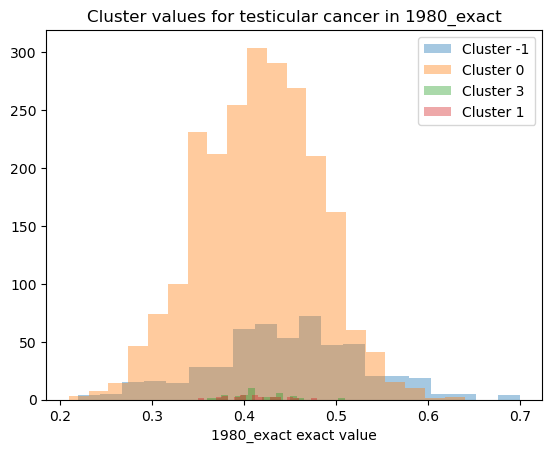

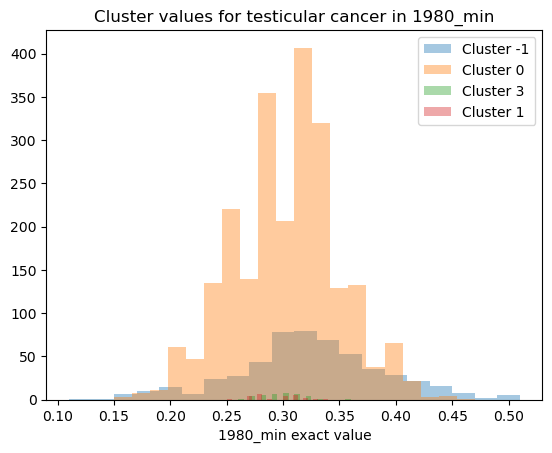

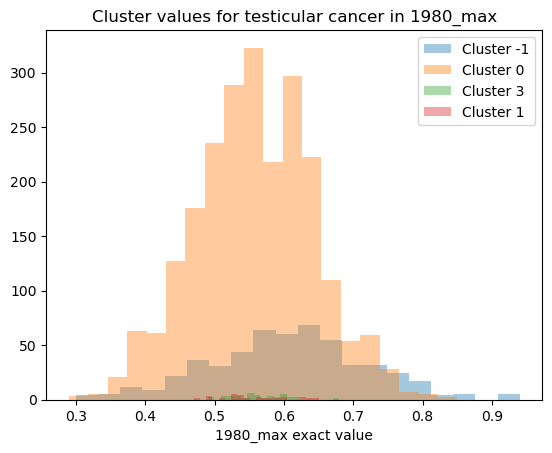

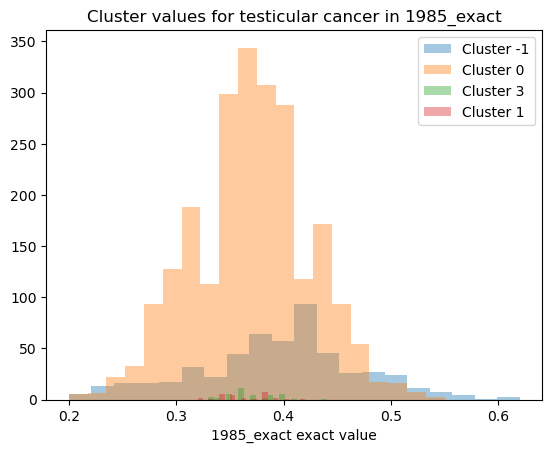

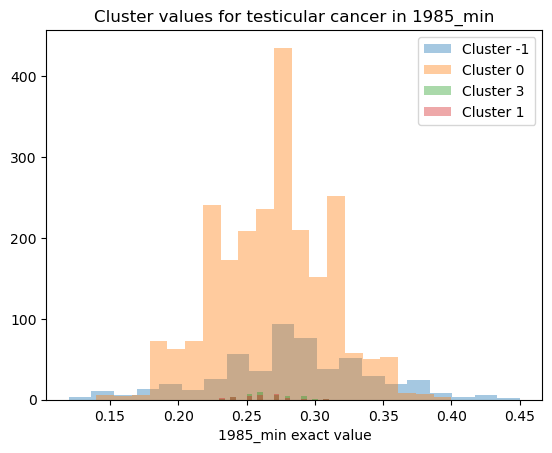

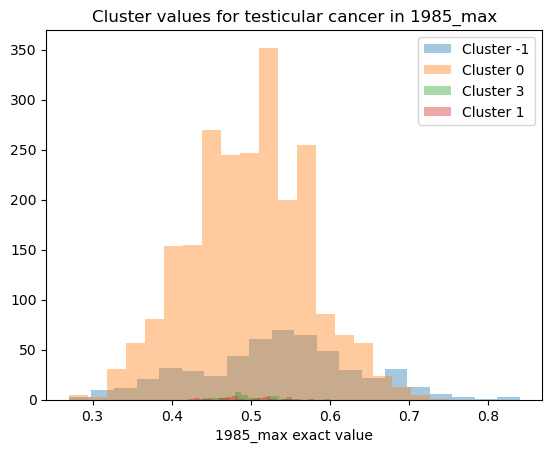

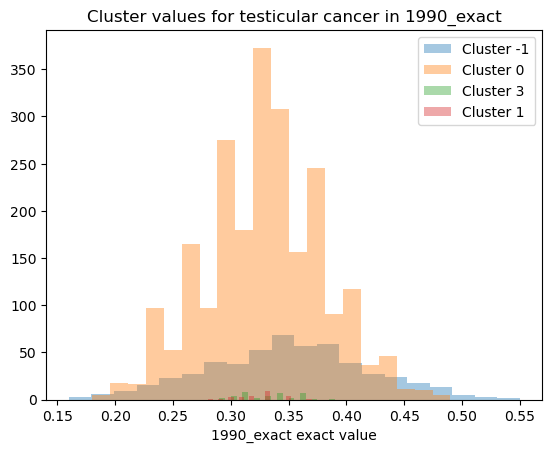

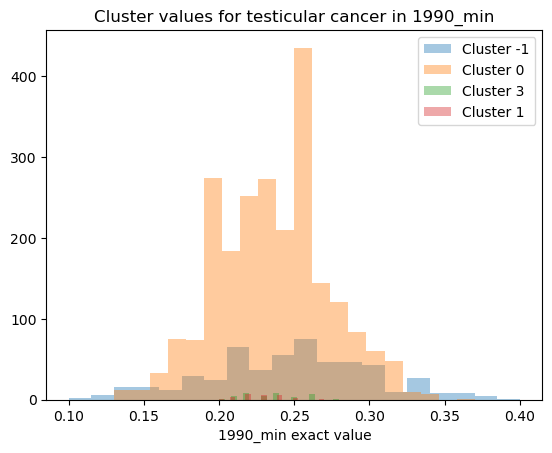

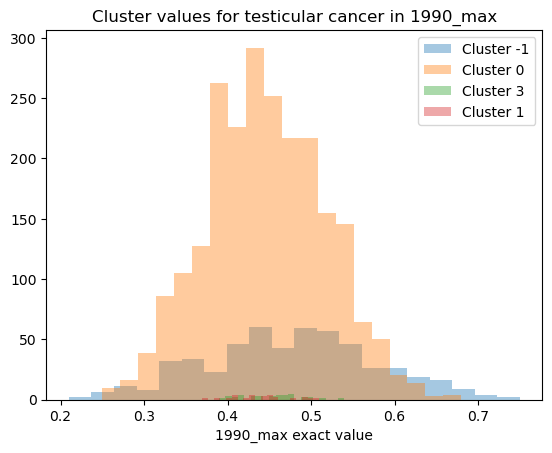

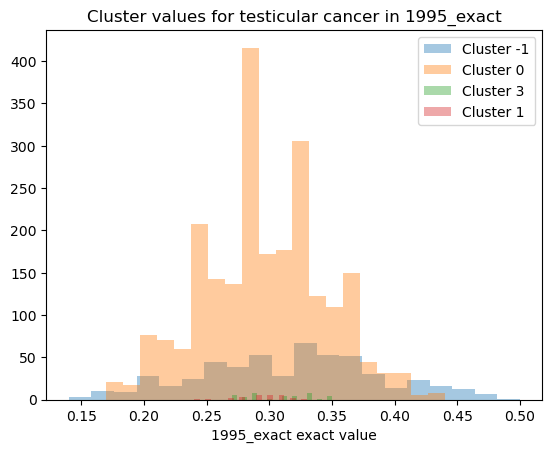

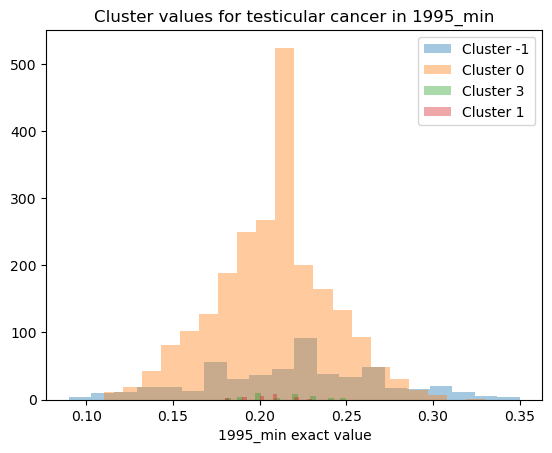

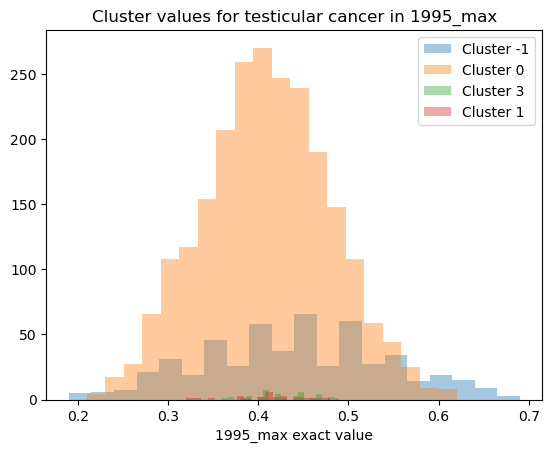

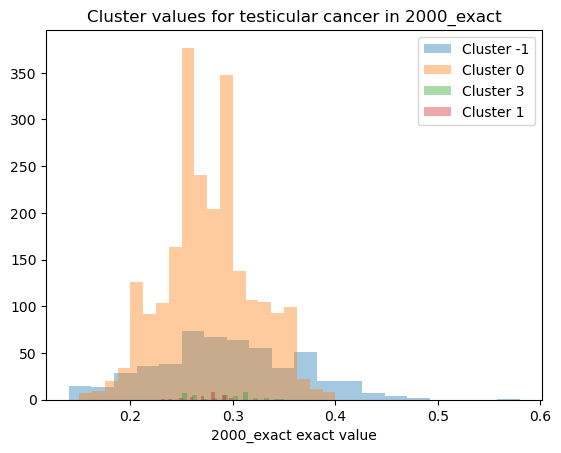

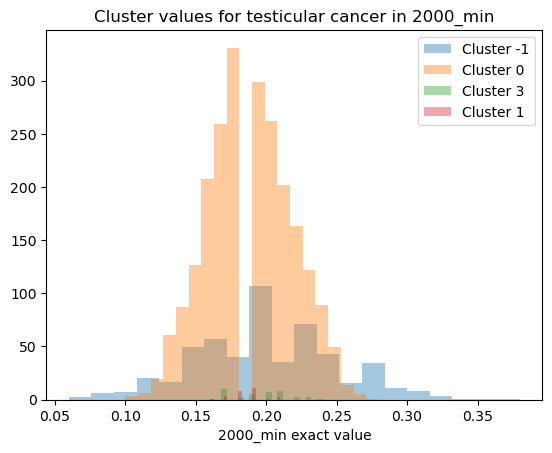

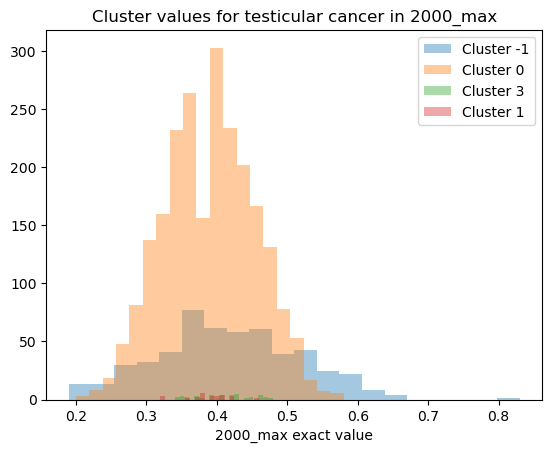

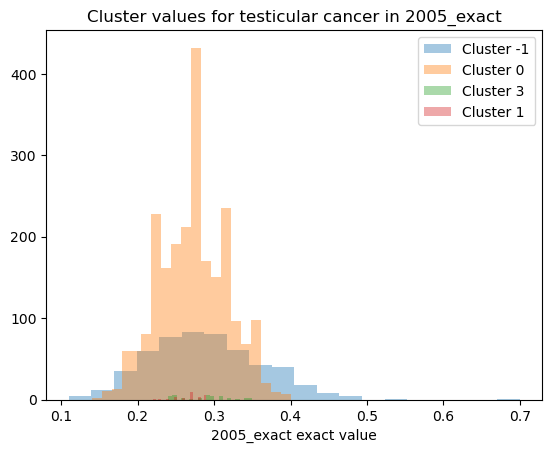

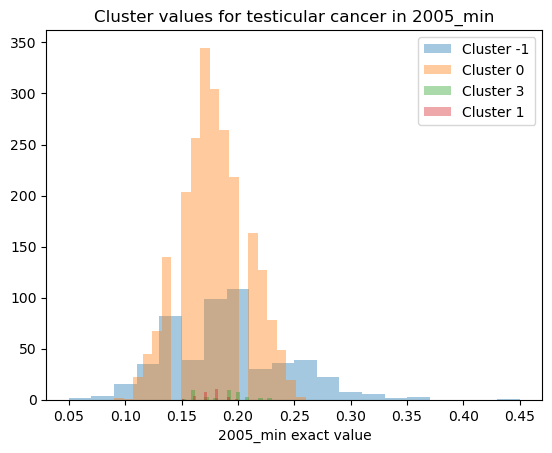

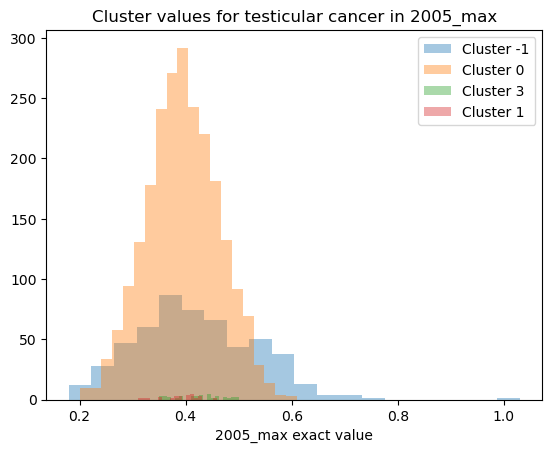

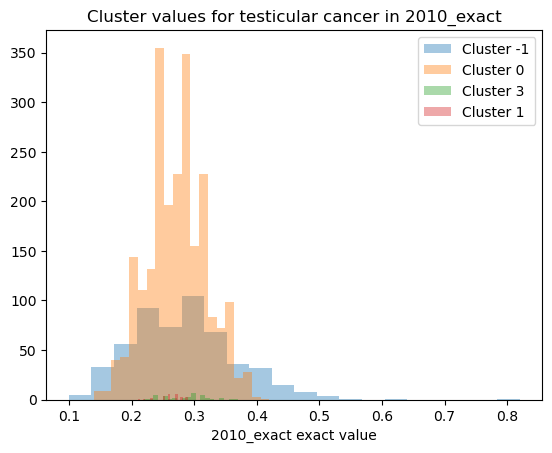

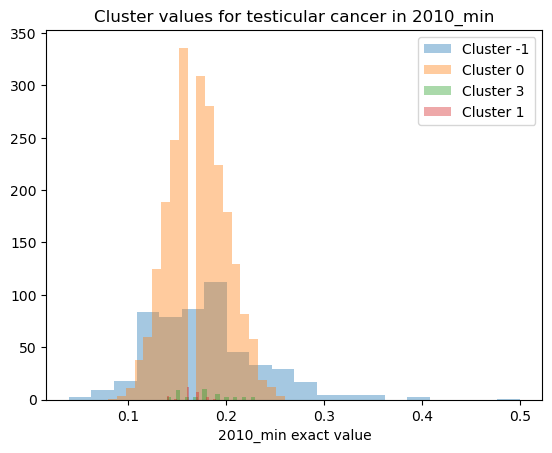

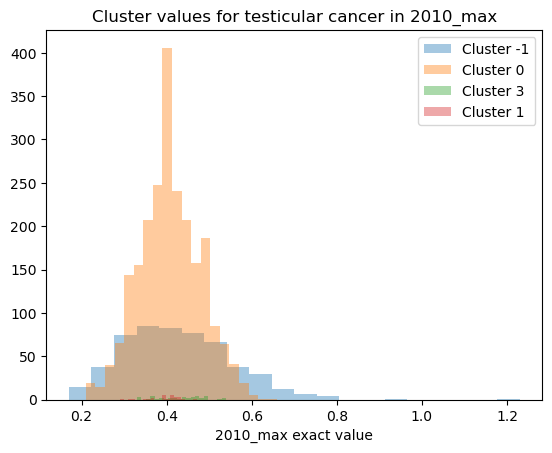

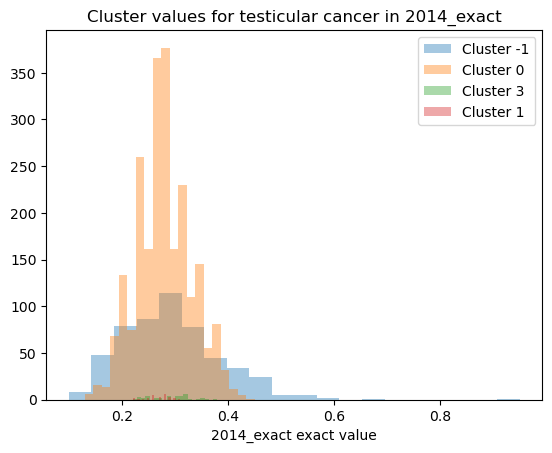

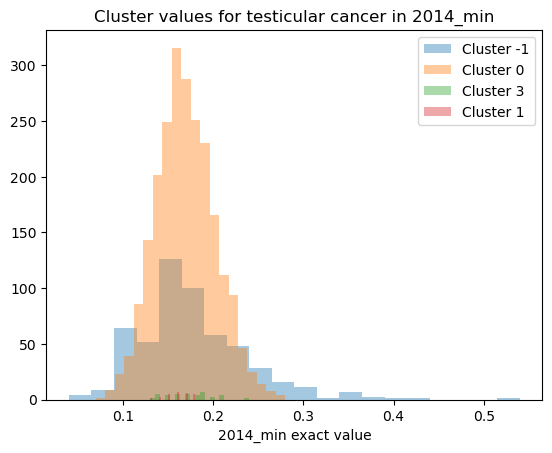

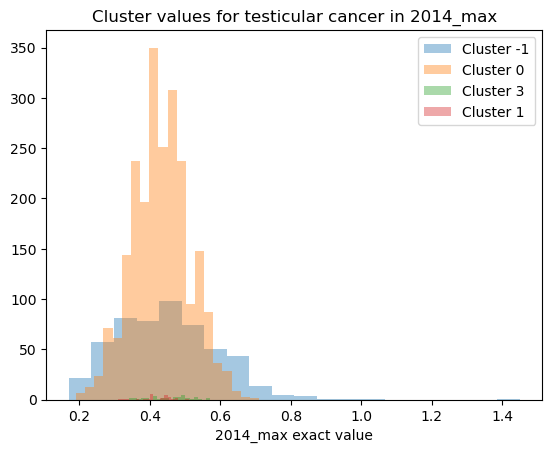

In [114]:
columns_to_iter = ['1980_exact', '1980_min', '1980_max', '1985_exact',
                                    '1985_min', '1985_max', '1990_exact', '1990_min', '1990_max',
                                    '1995_exact', '1995_min', '1995_max', '2000_exact', '2000_min',
                                    '2000_max', '2005_exact', '2005_min', '2005_max', '2010_exact',
                                    '2010_min', '2010_max', '2014_exact', '2014_min', '2014_max']

for col in columns_to_iter:
    plt.hist(nat_df_tst_graph_data.loc[nat_df_tst_graph_data[-1]][[col]], bins=20, label='Cluster -1', alpha=0.4,)
    plt.hist(nat_df_tst_graph_data.loc[nat_df_tst_graph_data[0]][[col]], bins=20, label='Cluster 0', alpha=0.4,)
    plt.hist(nat_df_tst_graph_data.loc[nat_df_tst_graph_data[3]][[col]], bins=20, label='Cluster 3', alpha=0.4,)
    plt.hist(nat_df_tst_graph_data.loc[nat_df_tst_graph_data[1]][[col]], bins=20, label='Cluster 1', alpha=0.4,)
    plt.legend()
    plt.xlabel(f"{col} exact value")
    plt.title(f"Cluster values for testicular cancer in {col}")
    plt.show()

There are some patterns that may be seen in this cluster comparison. Cluster -1 is clearly right-shifted relative to cluster 0. On the other hand, there doesn't seem to be much of a difference between that and clusters 3 and 1. 

As cluster -1 consists of data in the west, and cluster 0 in the east, this is revealing of a distinct pattern in which the east has higher mortality rates than the west. This is an interesting distinction in the data. 

To look at ```Nasopharynx cancer```:

In [141]:
nat_df_npx = national_dfs['Nasopharynx cancer']
nat_df_npx[['cluster']].value_counts()

cluster
 0         2013
-1          718
 5           67
 1           33
 4           32
 17          24
 6           22
 12          19
 2           16
 3           15
 7           15
 10          13
 11          10
 13           9
 16           8
 18           8
 9            8
 14           8
 8            8
 19           8
 15           7
Name: count, dtype: int64

In [142]:
cluster_dfs = pd.get_dummies(nat_df_npx['cluster'])
nat_df_npx = cluster_dfs.merge(nat_df_npx, left_index=True, right_index=True)

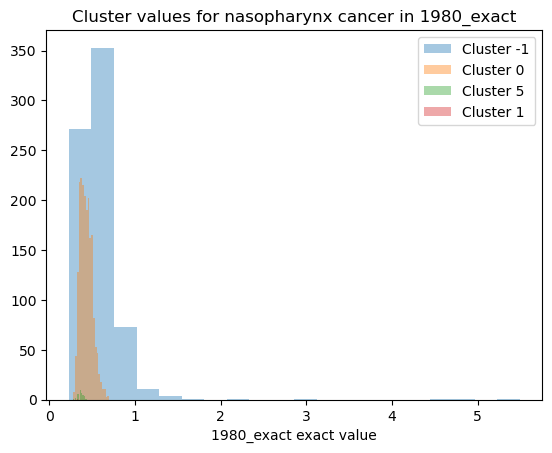

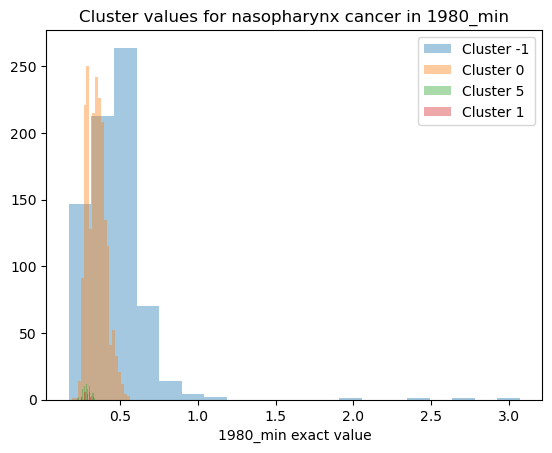

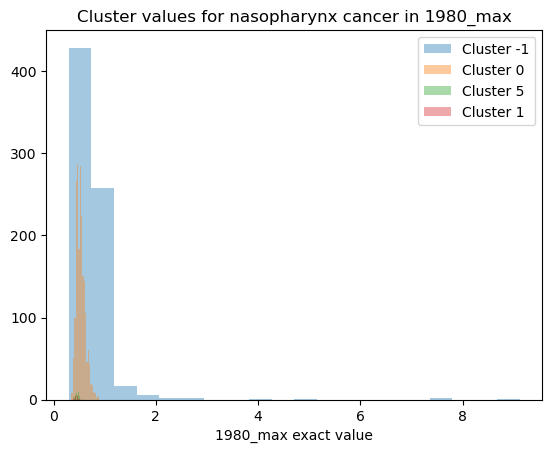

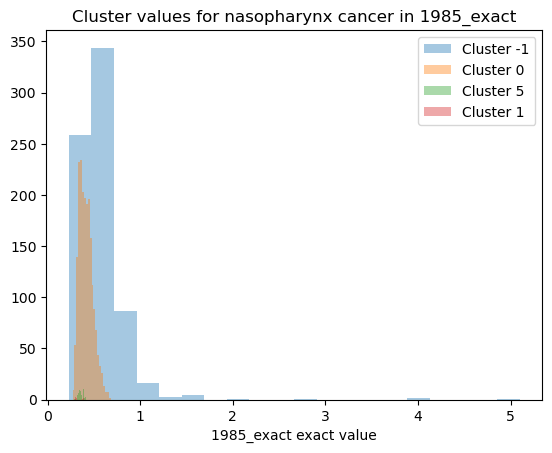

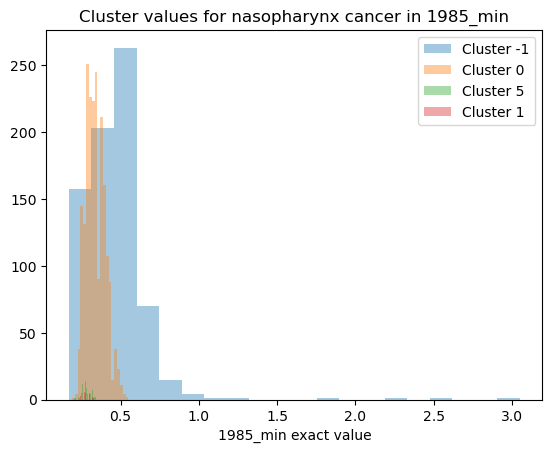

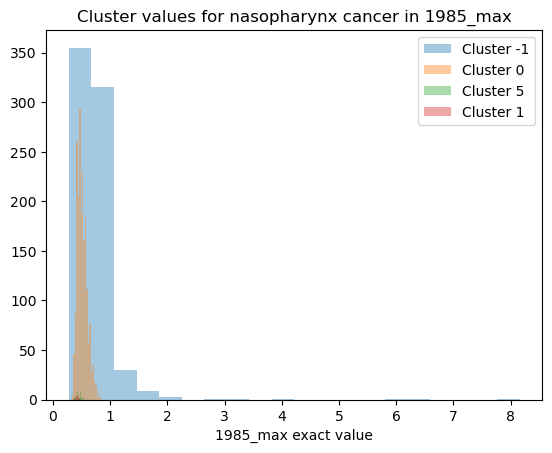

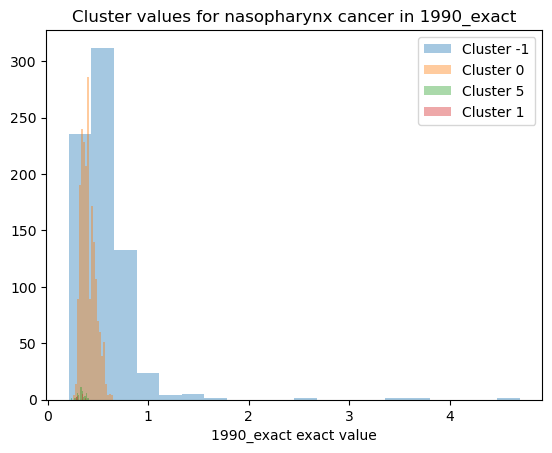

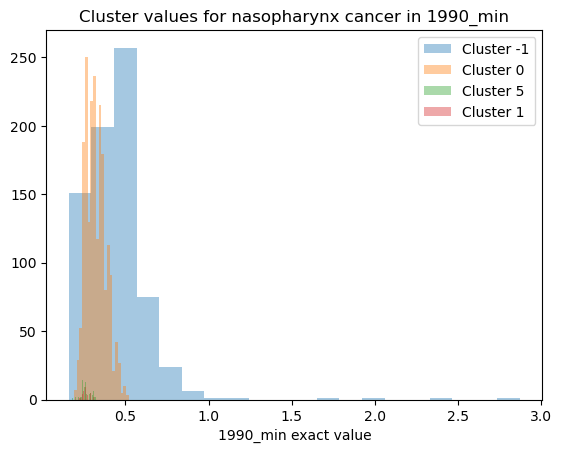

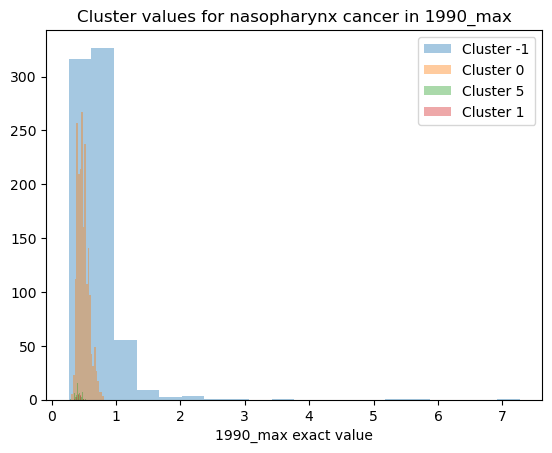

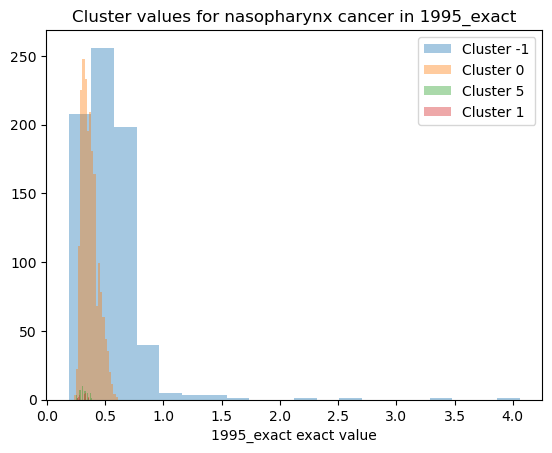

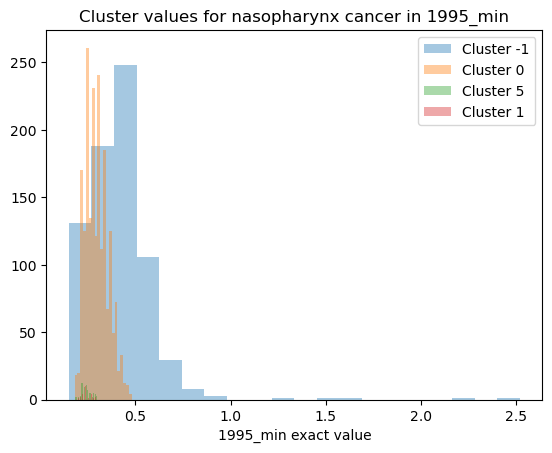

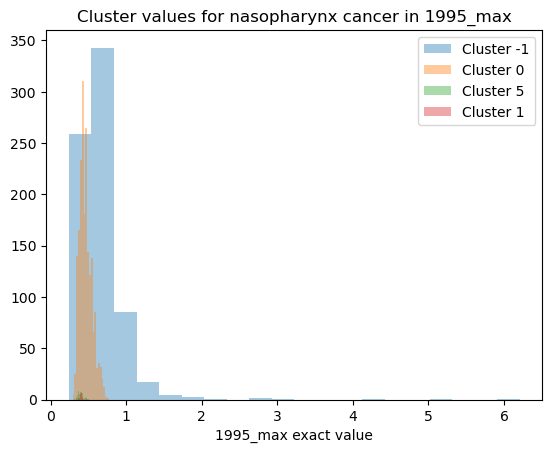

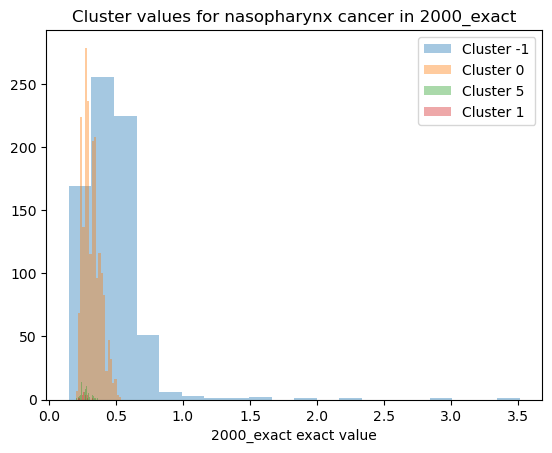

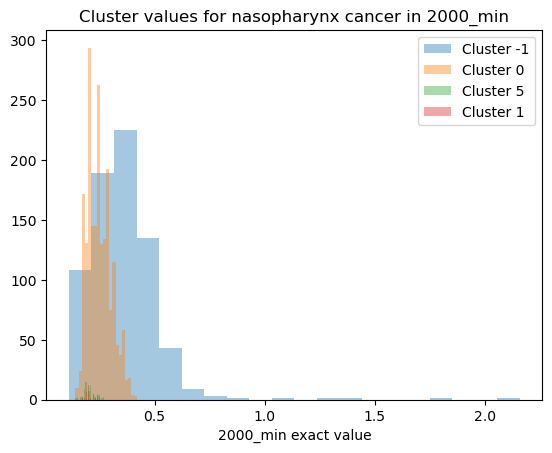

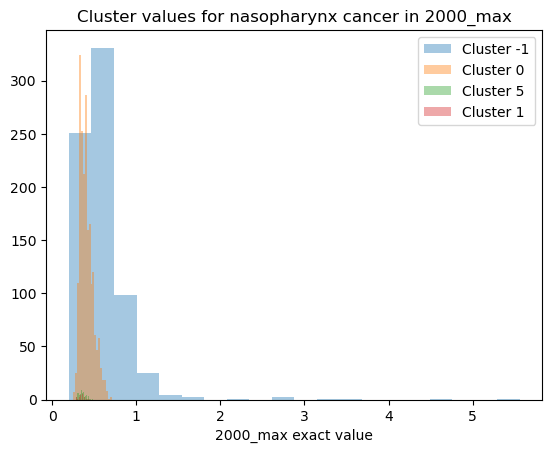

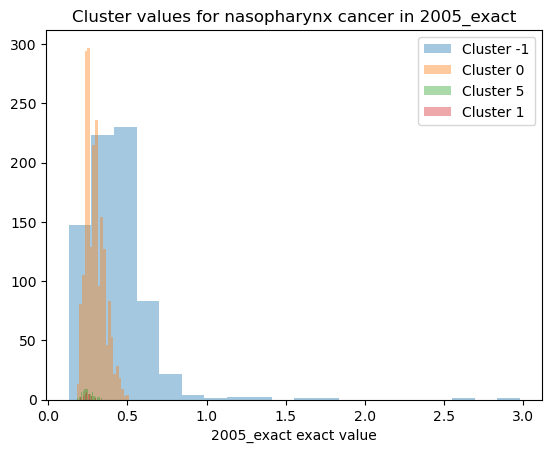

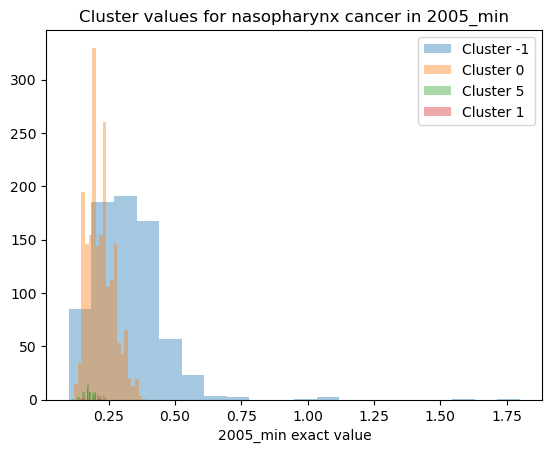

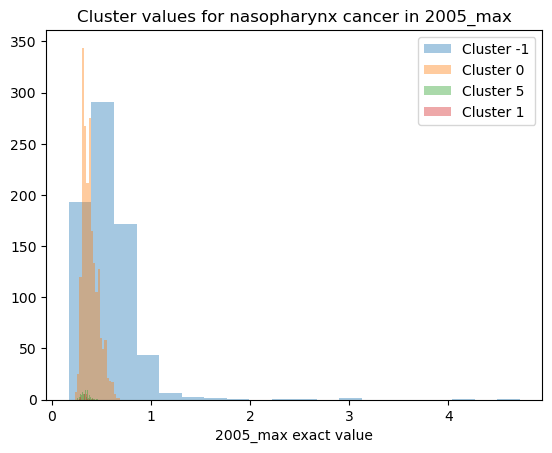

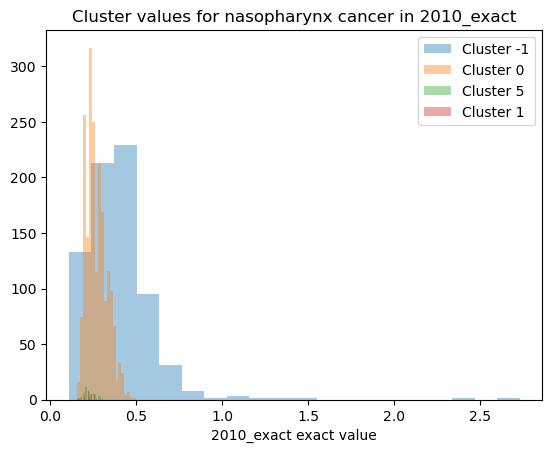

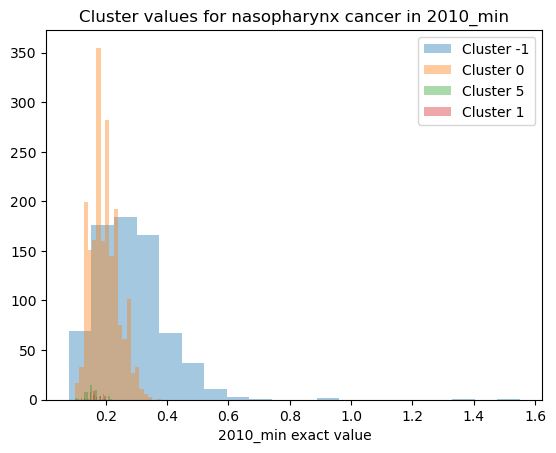

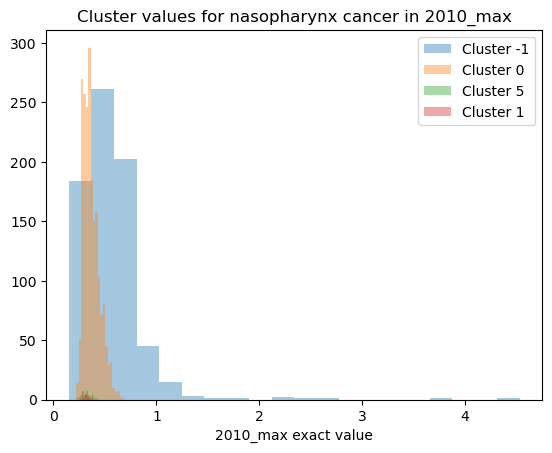

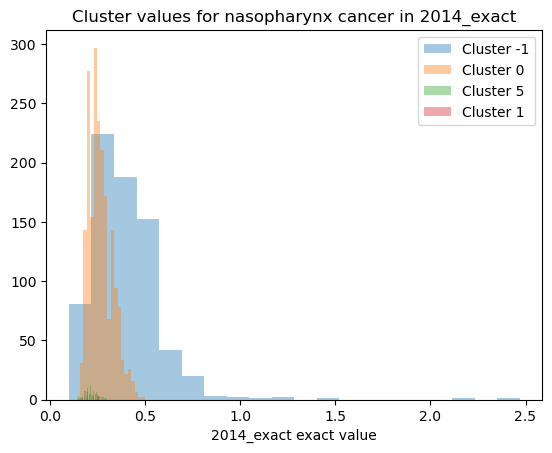

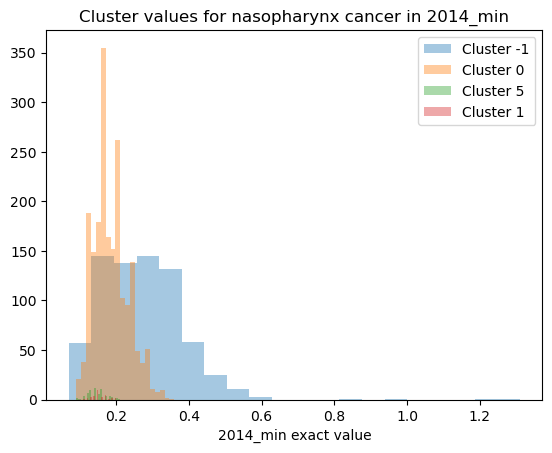

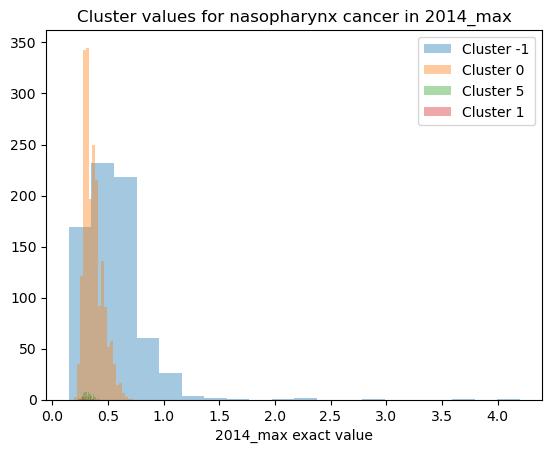

In [143]:
for col in columns_to_iter:
    plt.hist(nat_df_npx.loc[nat_df_npx[-1]][[col]], bins=20, label='Cluster -1', alpha=0.4,)
    plt.hist(nat_df_npx.loc[nat_df_npx[0]][[col]], bins=20, label='Cluster 0', alpha=0.4,)
    plt.hist(nat_df_npx.loc[nat_df_npx[5]][[col]], bins=20, label='Cluster 5', alpha=0.4,)
    plt.hist(nat_df_npx.loc[nat_df_npx[1]][[col]], bins=20, label='Cluster 1', alpha=0.4,)
    plt.legend()
    plt.xlabel(f"{col} exact value")
    plt.title(f"Cluster values for nasopharynx cancer in {col}")
    plt.show()

This shows the right-shifted pattern.

This is the most striking difference and has been wrapped into several cancer cases. 

### Conclusion

In conclusion, there is a distinct difference between the eastern and western United States. In the east, excluding the Northeast, there is a higher cancer mortality rate than in the west. There are several hypothetical explanations of this - older infrastructure in the east, or lower density rates in the west - but this will require further data to answer.